[*********************100%***********************]  5 of 5 completed


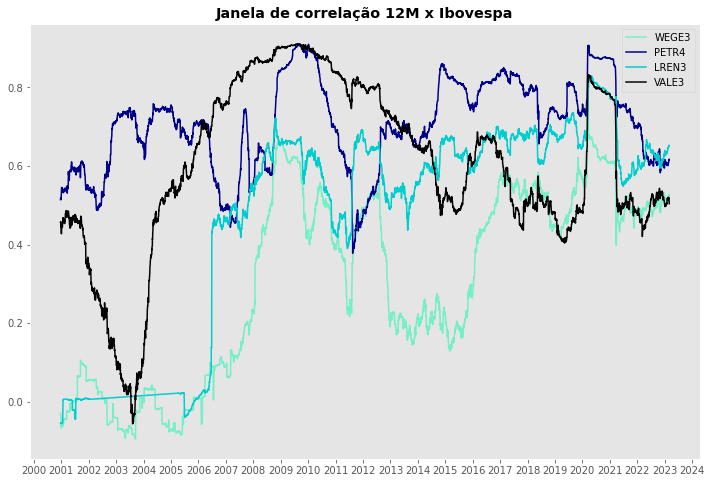

In [4]:
#Janela de correlação de 12 meses de ações x Ibovespa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import mplcyberpunk
import matplotlib.ticker as mtick
import matplotlib.dates as mdate

plt.style.use("ggplot")

acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Adj Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots(figsize=(12, 8))

acoes.remove("^BVSP")

cores = ['#76EEC6', '#00008B', '#00CDCD', '#050505']

for i, acao in enumerate(acoes):
    
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label = acao.replace(".SA", ""), color = cores[i])

ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight ="bold")


plt.show()